In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.io import fits
from matplotlib_venn import venn3, venn3_circles
import matplotlib.lines as lines
from astropy import constants as const
from astropy.io import fits
import astropy.coordinates as coord
import astropy.units as u
from astropy.table import Table
# import ephem
from astropy.cosmology import FlatLambdaCDM


## Constants pulled directly from Becky's Repository ;)

In [2]:
#---------------------------------------------------------
#Constants, taken from mass_SFR.py done by former students
#---------------------------------------------------------
Mag_sun_w1 = 3.254
Mag_sun_error_w1 = np.sqrt(0.008**2+0.02**2) #extra 0!!
Mag_sun_kt = 3.302
Mag_sun_error_kt = np.sqrt(0.008**2+0.02**2)
lum_sun = 3.828e26 #in W from NASA fact sheet
c = const.c.to('km/s').value #c in km/s
nu_3 = (c*1000)/(11.5608e-6) #in s^-1 from Table 1 in Jarrett et al. (2011) (link: http://iopscience.iop.org/article/10.1088/0004-637X/735/2/112/pdf)
zp_3 = 31.674 #in Jy Table 1 this WISE guide: http://wise2.ipac.caltech.edu/docs/release/allsky/expsup/sec4_4h.html#example
a_3 = [1.13, 10.24] #Cluver14
a_4 = [0.82, 7.3] #Cluver14
h0 = 73.8 #h0 in km/(Mpc*s) Riess2011
h0_error = 2.4 # km/(Mpc*s)
parsec = 3.08567758e16 #m
jansky = 1e-26 #W/m^2/Hz
cosmo = FlatLambdaCDM(h0, Om0=0.262) # Shawn: to match cosmology used by Becky

## Read in all data from .csv files.

In [3]:
# Reading in Data
spec = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/final_sample.csv')
spec_in_gama = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/spec_in_gama.csv')
spec_with_mass = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/spec_with_mass.csv')

mac = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/linkstable_trimmed.csv')
mac_in_gama = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/mac_in_gama.csv')
mac_in_gama_withgamaid = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/mac_in_gama_withgamaid.csv')
mac_with_mass = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/mac_with_mass.csv')

zoo_in_gama = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/zoo_in_gama.csv')
zoo_in_gama_found_lens = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/zoo_in_gama_found_lens.csv')
zoo_20 = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/zoo_20.csv')
zoo_with_mass = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/zoo_with_mass.csv')
zoo_lens_with_mass = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/zoo_lens_with_mass.csv')
zoo_lens20_with_mass = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/zoo_lens20_with_mass.csv')

mac_and_spec_matches = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/mac_and_spec_matches.csv')
mac_and_zoo_matches = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/mac_and_zoo_matches.csv')
spec_and_zoo_matches = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/spec_and_zoo_matches.csv')

In [4]:
## Analyzing the specific characteristics of overlap regions.

pd.merge(mac_and_spec_matches, spec_with_mass, on = 'GAMA_ID', how = 'left')

pd.merge(mac_and_zoo_matches, mac_with_mass, on = 'GAMA_ID', how = 'left')

pd.merge(spec_and_zoo_matches, spec_with_mass, on = 'GAMA_ID', how = 'left')

,Unnamed: 0_x,GAMA_ID,RA_x,DEC_x,ZOO_SCORE,Unnamed: 0_y,Unnamed: 0.1,RA_y,DEC_y,z1,z2,spec_type,STELLAR_MASS,Z
0,79,460463,212.48058,-1.61746,0.139206,79,79,212.48058,-1.61746,0.115,0.411,PG+ELG,3.127000e+10,0.1153


## Analyzing the specific characteristics of uncut overlap regions.

In [5]:
pd.merge(mac_and_spec_matches, spec_with_mass, on = 'GAMA_ID', how = 'left')

,Unnamed: 0_x,GAMA_ID,ID,RA_x,DEC_x,MAC_SCORE,Unnamed: 0_y,Unnamed: 0.1,RA_y,DEC_y,z1,z2,spec_type,STELLAR_MASS,Z
0,78,202448,1129.0,129.69546,-0.38179,4.0,1,1,129.69546,-0.38179,0.418,0.738,PG+ELG,NaN,NaN
1,79,323200,3430.0,130.73717,1.55957,4.0,9,9,130.73717,1.55957,0.416,0.350,PG+ELG,1.216000e+11,0.4158
2,278,220682,1618.0,182.74350,1.59787,4.0,45,45,182.74350,1.59787,0.289,0.361,PG+ELG,1.130000e+11,0.2889
3,368,342308,501.0,215.06900,2.22422,4.0,78,78,215.06900,2.22422,0.391,0.328,PG+ELG,3.661000e+11,0.3906


In [6]:
pd.merge(mac_and_zoo_matches, mac_with_mass, on = 'GAMA_ID', how = 'left')

,Unnamed: 0_x,GAMA_ID,ID_x,RA_x,DEC_x,MAC_SCORE,ZOO_SCORE,Unnamed: 0_y,Unnamed: 0.1,ID_y,RA_y,DEC_y,SCORE,STELLAR_MASS,Z
0,124,517068,3063.0,130.59385,2.46237,4.0,0.137209,124,124,3063.0,130.59390,2.46245,4.0,1.081000e+11,0.1378
1,151,165409,3098.0,181.19655,-2.72003,38.0,0.059543,151,151,3098.0,181.19672,-2.72009,38.0,2.641000e+10,0.0196
2,158,124486,2553.0,179.72998,-2.51919,28.0,0.426190,158,158,2553.0,179.73003,-2.51895,28.0,8.541000e+10,0.1435
3,166,165871,2803.0,183.70237,-2.78805,18.0,0.282701,166,166,2803.0,183.70247,-2.78789,18.0,8.850000e+10,0.1089
4,168,164145,2805.0,176.55308,-2.77562,16.0,0.092265,168,168,2805.0,176.55307,-2.77556,16.0,7.301000e+10,0.0966
5,170,271500,2496.0,174.51145,1.34984,16.0,0.139357,170,170,2496.0,174.51166,1.35002,16.0,2.540000e+11,0.1340
6,170,271500,2496.0,174.51145,1.34984,16.0,0.139357,293,293,375.0,174.51164,1.35002,4.0,2.540000e+11,0.1340
7,293,271500,375.0,174.51145,1.34984,4.0,0.139357,170,170,2496.0,174.51166,1.35002,16.0,2.540000e+11,0.1340
8,293,271500,375.0,174.51145,1.34984,4.0,0.139357,293,293,375.0,174.51164,1.35002,4.0,2.540000e+11,0.1340
9,300,136604,1642.0,175.87349,-1.74167,58.0,0.316451,300,300,1642.0,175.87355,-1.74164,58.0,2.866000e+11,0.1060


In [7]:
pd.merge(spec_and_zoo_matches, spec_with_mass, on = 'GAMA_ID', how = 'left')

,Unnamed: 0_x,GAMA_ID,RA_x,DEC_x,ZOO_SCORE,Unnamed: 0_y,Unnamed: 0.1,RA_y,DEC_y,z1,z2,spec_type,STELLAR_MASS,Z
0,79,460463,212.48058,-1.61746,0.139206,79,79,212.48058,-1.61746,0.115,0.411,PG+ELG,3.127000e+10,0.1153


## Double-checking all Zoo objects against our Spec and Mac candidates. If any of Spec and Mac are below z - 0.15, it SHOULD be in Zoo, even if it has a score of 0 (which is probable!).

In [8]:
allzoo_and_spec = pd.merge(zoo_in_gama, spec_with_mass, on = 'GAMA_ID', how = 'inner')
allzoo_and_spec

,Unnamed: 0_x,GAMA_ID,RA_x,DEC_x,LENS_SCORE,Unnamed: 0_y,Unnamed: 0.1,RA_y,DEC_y,z1,z2,spec_type,STELLAR_MASS,Z
0,16322,209222,132.36767,0.16359,0.000000,3,3,132.36771,0.16360,0.128,0.603,PG+ELG,1.425000e+10,0.1277
1,18774,371208,130.50925,1.02071,0.000000,13,13,130.50925,1.02071,0.077,0.699,PG+ELG,4.812000e+09,0.0767
2,18823,417645,132.51888,2.29438,0.000000,20,20,132.51888,2.29438,0.108,0.457,PG+ELG,8.476000e+09,0.1076
3,22763,71072,182.90017,0.17959,0.000000,36,36,182.90017,0.17959,0.255,0.122,PG+ELG,1.494000e+09,0.1219
4,24310,164640,178.14021,-2.71487,0.000000,43,43,178.14021,-2.71487,0.078,0.153,PG+ELG,5.109000e+10,0.0781
5,25949,460463,212.48058,-1.61746,0.139206,79,79,212.48058,-1.61746,0.115,0.411,PG+ELG,3.127000e+10,0.1153
6,27518,15554,215.97479,0.67592,0.000000,63,63,215.97479,0.67592,0.142,0.227,PG+ELG,1.835000e+10,0.1421
7,28545,320384,218.13475,1.68924,0.000000,76,76,218.13475,1.68924,0.109,0.192,PG+ELG,5.747000e+09,0.1093
8,30871,319416,214.38538,1.91140,0.000000,75,75,214.38538,1.91140,0.051,0.245,PG+ELG,8.759000e+08,0.0508


In [9]:
allzoo_and_mac = pd.merge(zoo_in_gama, mac_with_mass, on = 'GAMA_ID', how = 'inner')
allzoo_and_mac

,Unnamed: 0_x,GAMA_ID,RA_x,DEC_x,LENS_SCORE,Unnamed: 0_y,Unnamed: 0.1,ID,RA_y,DEC_y,SCORE,STELLAR_MASS,Z
0,1223,165871,183.70237,-2.78805,0.282701,166,166,2803.0,183.70247,-2.78789,18.0,8.850000e+10,0.1089
1,3102,271500,174.51145,1.34984,0.139357,170,170,2496.0,174.51166,1.35002,16.0,2.540000e+11,0.1340
2,3102,271500,174.51145,1.34984,0.139357,293,293,375.0,174.51164,1.35002,4.0,2.540000e+11,0.1340
3,5585,165409,181.19655,-2.72003,0.059543,151,151,3098.0,181.19672,-2.72009,38.0,2.641000e+10,0.0196
4,5772,124486,179.72998,-2.51919,0.426190,158,158,2553.0,179.73003,-2.51895,28.0,8.541000e+10,0.1435
5,7879,15705,216.60182,0.83269,0.000000,322,322,2668.0,216.60178,0.83273,16.0,2.050000e+11,0.1262
6,8451,618600,216.26346,0.26191,0.011410,389,389,613.0,216.26350,0.26191,4.0,1.572000e+11,0.1346
7,8843,592737,213.84648,-0.03484,0.155171,404,404,383.0,213.84665,-0.03468,4.0,7.382000e+10,0.1241
8,9772,49014,219.24139,-0.82447,0.000000,405,405,3174.0,219.24140,-0.82438,4.0,9.930000e+10,0.1385
9,10673,106569,216.66542,0.84988,0.178933,393,393,1524.0,216.66547,0.84990,4.0,7.419000e+10,0.1453


### Do these account for the Spec and Mac candidates at low-z?

In [10]:
spec_check_in_zoo = pd.merge(allzoo_and_spec, spec_with_mass[spec_with_mass.Z <= 0.015], on = 'GAMA_ID', how = 'outer')
spec_check_in_zoo
#spec_with_mass[spec_with_mass.Z <= 0.15]

# Yes.

,Unnamed: 0_x,GAMA_ID,RA_x,DEC_x,LENS_SCORE,Unnamed: 0_y,Unnamed: 0.1_x,RA_y,DEC_y,z1_x,...,Z_x,Unnamed: 0,Unnamed: 0.1_y,RA,DEC,z1_y,z2_y,spec_type_y,STELLAR_MASS_y,Z_y
0,16322,209222,132.36767,0.16359,0.000000,3,3,132.36771,0.16360,0.128,...,0.1277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18774,371208,130.50925,1.02071,0.000000,13,13,130.50925,1.02071,0.077,...,0.0767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18823,417645,132.51888,2.29438,0.000000,20,20,132.51888,2.29438,0.108,...,0.1076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22763,71072,182.90017,0.17959,0.000000,36,36,182.90017,0.17959,0.255,...,0.1219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24310,164640,178.14021,-2.71487,0.000000,43,43,178.14021,-2.71487,0.078,...,0.0781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,25949,460463,212.48058,-1.61746,0.139206,79,79,212.48058,-1.61746,0.115,...,0.1153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,27518,15554,215.97479,0.67592,0.000000,63,63,215.97479,0.67592,0.142,...,0.1421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,28545,320384,218.13475,1.68924,0.000000,76,76,218.13475,1.68924,0.109,...,0.1093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,30871,319416,214.38538,1.91140,0.000000,75,75,214.38538,1.91140,0.051,...,0.0508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#mac_with_mass[mac_with_mass.Z <= 0.15]
mac_check_in_zoo = pd.merge(allzoo_and_mac, mac_with_mass[mac_with_mass.Z <= 0.015], how = 'outer', on = 'GAMA_ID')
mac_check_in_zoo

,Unnamed: 0_x,GAMA_ID,RA_x,DEC_x,LENS_SCORE,Unnamed: 0_y,Unnamed: 0.1_x,ID_x,RA_y,DEC_y,...,STELLAR_MASS_x,Z_x,Unnamed: 0,Unnamed: 0.1_y,ID_y,RA,DEC,SCORE_y,STELLAR_MASS_y,Z_y
0,1223,165871,183.70237,-2.78805,0.282701,166,166,2803.0,183.70247,-2.78789,...,8.850000e+10,0.1089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3102,271500,174.51145,1.34984,0.139357,170,170,2496.0,174.51166,1.35002,...,2.540000e+11,0.1340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3102,271500,174.51145,1.34984,0.139357,293,293,375.0,174.51164,1.35002,...,2.540000e+11,0.1340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5585,165409,181.19655,-2.72003,0.059543,151,151,3098.0,181.19672,-2.72009,...,2.641000e+10,0.0196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5772,124486,179.72998,-2.51919,0.426190,158,158,2553.0,179.73003,-2.51895,...,8.541000e+10,0.1435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,7879,15705,216.60182,0.83269,0.000000,322,322,2668.0,216.60178,0.83273,...,2.050000e+11,0.1262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,8451,618600,216.26346,0.26191,0.011410,389,389,613.0,216.26350,0.26191,...,1.572000e+11,0.1346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8843,592737,213.84648,-0.03484,0.155171,404,404,383.0,213.84665,-0.03468,...,7.382000e+10,0.1241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9772,49014,219.24139,-0.82447,0.000000,405,405,3174.0,219.24140,-0.82438,...,9.930000e+10,0.1385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10673,106569,216.66542,0.84988,0.178933,393,393,1524.0,216.66547,0.84990,...,7.419000e+10,0.1453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Why would Zoo miss those 8 Spec candidates and 4 Mac candidates?
Well... z and masses are not on either extreme of the ranges.
Mac scores of the 4 misses are 4, 4, 4, 16

In [12]:
zoo_missed_spec = allzoo_and_spec[allzoo_and_spec.LENS_SCORE == 0]
zoo_missed_spec

,Unnamed: 0_x,GAMA_ID,RA_x,DEC_x,LENS_SCORE,Unnamed: 0_y,Unnamed: 0.1,RA_y,DEC_y,z1,z2,spec_type,STELLAR_MASS,Z
0,16322,209222,132.36767,0.16359,0.0,3,3,132.36771,0.16360,0.128,0.603,PG+ELG,1.425000e+10,0.1277
1,18774,371208,130.50925,1.02071,0.0,13,13,130.50925,1.02071,0.077,0.699,PG+ELG,4.812000e+09,0.0767
2,18823,417645,132.51888,2.29438,0.0,20,20,132.51888,2.29438,0.108,0.457,PG+ELG,8.476000e+09,0.1076
3,22763,71072,182.90017,0.17959,0.0,36,36,182.90017,0.17959,0.255,0.122,PG+ELG,1.494000e+09,0.1219
4,24310,164640,178.14021,-2.71487,0.0,43,43,178.14021,-2.71487,0.078,0.153,PG+ELG,5.109000e+10,0.0781
6,27518,15554,215.97479,0.67592,0.0,63,63,215.97479,0.67592,0.142,0.227,PG+ELG,1.835000e+10,0.1421
7,28545,320384,218.13475,1.68924,0.0,76,76,218.13475,1.68924,0.109,0.192,PG+ELG,5.747000e+09,0.1093
8,30871,319416,214.38538,1.91140,0.0,75,75,214.38538,1.91140,0.051,0.245,PG+ELG,8.759000e+08,0.0508


In [13]:
zoo_missed_mac = allzoo_and_mac[allzoo_and_mac.LENS_SCORE == 0]
zoo_missed_mac

,Unnamed: 0_x,GAMA_ID,RA_x,DEC_x,LENS_SCORE,Unnamed: 0_y,Unnamed: 0.1,ID,RA_y,DEC_y,SCORE,STELLAR_MASS,Z
5,7879,15705,216.60182,0.83269,0.0,322,322,2668.0,216.60178,0.83273,16.0,2.050000e+11,0.1262
8,9772,49014,219.24139,-0.82447,0.0,405,405,3174.0,219.24140,-0.82438,4.0,9.930000e+10,0.1385
12,15937,386213,130.61321,2.12031,0.0,123,123,3008.0,130.61320,2.12032,4.0,6.970000e+10,0.0960
14,27329,511725,215.82188,-1.26626,0.0,363,363,951.0,215.82188,-1.26624,4.0,6.224000e+10,0.1418


/home/shawn/miniconda3/envs/astroconda/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([439., 473., 469., 472., 497., 495., 496., 425., 409., 360., 309.,
        279., 297., 237., 190., 235., 154., 142., 159., 145., 101.,  93.,
         91.,  85.,  93.,  45.,  61.,  57.,  42.,  41.,  56.,  69.,  34.,
         31.,  27.,  21.,  20.,  18.,  25.,  16.,  21.,  30.,  18.,  11.,
         14.,   8.,   5.,  10.,   7.,   7.,   7.,   5.,   5.,   3.,   5.,
          5.,   7.,   3.,   5.,  10.,   3.,   1.,   2.,   2.,   4.,   1.,
          3.,   1.,   0.,   2.,   2.,   2.,   0.,   1.,   1.,   1.,   1.,
          3.,   2.,   2.,   0.,   0.,   0.,   0.,   1.,   2.,   1.,   1.,
          0.,   0.,   1.,   0.,   1.,   0.,   2.,   0.,   0.,   0.,   0.,
          0.,   2.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   1.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

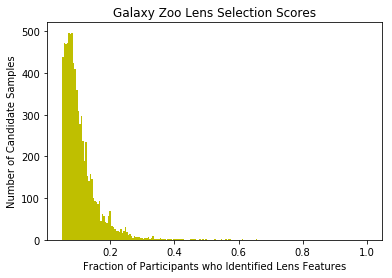

In [4]:
# Histogram of Lens Scores
plt.xlabel("Fraction of Participants who Identified Lens Features")
plt.ylabel("Number of Candidate Samples")
plt.title("Galaxy Zoo Lens Selection Scores")
plt.hist(zoo_in_gama_found_lens.LENS_SCORE,range=[0.05,1],bins=200,color='y')

#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Histogram_of_lens_scores.pdf')

## Comparing Lens Fraction Score vs Other "Odd" Feature Selection Options

In [2]:
# Opening Galaxy Zoo data
hdul = fits.open('/home/shawn/Desktop/gravitational_lensing_research/FITS_Files/galaxy_zoo_gama_cleaned.fits')  # open a FITS file
hdul.verify('fix')
galaxyzoo = hdul[1].data  # assume the first extension is a table
print(galaxyzoo.columns)

# Creating new DataFrame of GAMA ID and all oddtype scores

survey_id = galaxyzoo.survey_id
survey_id_int = [int(survey_id) for survey_id in survey_id]
none = galaxyzoo.oddtype_none_frac
ring = galaxyzoo.oddtype_ring_frac
lens = galaxyzoo.oddtype_lens_or_arc_frac
irregular = galaxyzoo.oddtype_irregular_frac
other = galaxyzoo.oddtype_other_frac
dust_lane = galaxyzoo.oddtype_dust_lane_frac
overlapping = galaxyzoo.oddtype_overlapping_frac

galaxyzoo_oddtype_data = list(zip(survey_id_int, none, ring, lens, irregular, other, dust_lane, overlapping))

galaxyzoo_oddtype_scores = pd.DataFrame(galaxyzoo_oddtype_data, columns = ['GAMA_ID', 'NONE', 'RING', 'LENS', 'IRREGULAR', 'OTHER', 'DUST_LANE', 'OVERLAPPING'])

zoo_with_all_scores = pd.merge(zoo_lens_with_mass, galaxyzoo_oddtype_scores, how = 'outer', on = 'GAMA_ID')

zoo_with_all_scores

ColDefs(
    name = 'region'; format = '6A'
    name = 'subject_id'; format = '24A'
    name = 'survey_id'; format = '7A'
    name = 'zooniverse_id'; format = '10A'
    name = 'features_total'; format = 'D'
    name = 'edgeon_total'; format = 'D'
    name = 'bar_total'; format = 'D'
    name = 'spiral_total'; format = 'D'
    name = 'bulge_total'; format = 'D'
    name = 'spiralwinding_total'; format = 'D'
    name = 'spiralnumber_total'; format = 'D'
    name = 'bulgeshape_total'; format = 'D'
    name = 'round_total'; format = 'D'
    name = 'mergers_total'; format = 'D'
    name = 'oddtype_total'; format = 'D'
    name = 'discuss_total'; format = 'D'
    name = 'odd_total'; format = 'D'
    name = 'features_smooth_frac'; format = 'D'
    name = 'features_features_frac'; format = 'D'
    name = 'features_star_or_artifact_frac'; format = 'D'
    name = 'edgeon_yes_frac'; format = 'D'
    name = 'edgeon_no_frac'; format = 'D'
    name = 'bar_bar_frac'; format = 'D'
    name = 'bar_no_b

NameError: name 'zoo_lens_with_mass' is not defined

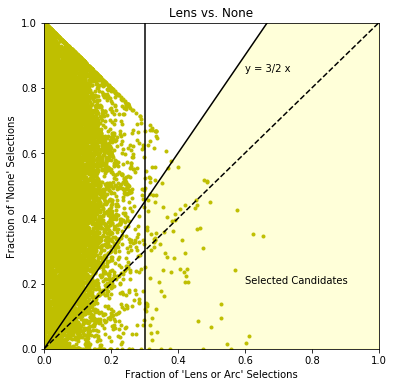

In [14]:
# Plotting Lens Fraction against other selections (6 total)

x = galaxyzoo.oddtype_lens_or_arc_frac
y = galaxyzoo.oddtype_none_frac

x = np.linspace(0, 1, 1000)

X = galaxyzoo.oddtype_lens_or_arc_frac
Y = galaxyzoo.oddtype_none_frac

fig, ax = plt.subplots(figsize=(6,6))
plt.plot(X, Y, 'y.')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.plot(x, x, 'k--') # line of slope 1
ax.plot(x, 3/2 * x, 'k-') # line of slope 3/2
#ax.plot([0,1], 'k--')
#ax.plot([0,4/3], 'k-')
plt.axvline(x=0.3, linestyle = '-', color = 'k')
plt.xlabel("Fraction of 'Lens or Arc' Selections")
plt.ylabel("Fraction of 'None' Selections")
plt.title("Lens vs. None")
plt.text(0.6, 0.2, "Selected Candidates")
plt.text(0.6, 0.85, "y = 3/2 x")
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Zoo_lens_vs_none.png')
plt.fill_between(x, y1 = 3/2 * x, y2=0, # Fill region for false candidates
                 where=(x>0.3),
                 facecolor="yellow", # The fill color
                 color='yellow',       # The outline color
                 alpha=0.15 # Transparency of the fill
                ) 

plt.show()

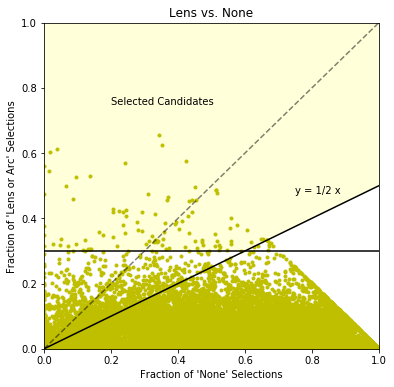

In [44]:
# Plotting Lens Fraction against other selections (6 total)

x = np.linspace(0, 1, 1000)

Y = galaxyzoo.oddtype_lens_or_arc_frac
X = galaxyzoo.oddtype_none_frac

fig, ax = plt.subplots(figsize=(6,6))
plt.plot(X, Y, 'y.')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
#ax.plot(x, 0.3, 'k-') # hor line at 0.3
ax.plot(x, x, 'k--', alpha = 0.5) # line of slope 1
ax.plot(x, 1/2 * x, 'k-') # line of slope 3/2
#ax.plot([0,1], 'k--')
#ax.plot([0,4/3], 'k-')
plt.axhline(y=0.3, linestyle = '-', color = 'k')
plt.ylabel("Fraction of 'Lens or Arc' Selections")
plt.xlabel("Fraction of 'None' Selections")
plt.title("Lens vs. None")
plt.text(0.2, 0.75, "Selected Candidates")
plt.text(0.75, 0.475, "y = 1/2 x")
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Zoo_lens_vs_none.png')
plt.fill_between(x, y1 = 1/2 * x, y2=2, # Fill region for false candidates
                 where=(x>0.6),
                 facecolor="yellow", # The fill color
                 #color='yellow',       # The outline color
                 alpha=0.15 # Transparency of the fill
                ) 

plt.fill_between(x, y1 = 0.3, y2=2, # Fill region for false candidates
                 where=(y<0.6),
                 facecolor="yellow", # The fill color
                 #color='yellow',       # The outline color
                 alpha=0.15 # Transparency of the fill
                ) 

plt.show()

/home/shawn/miniconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in greater


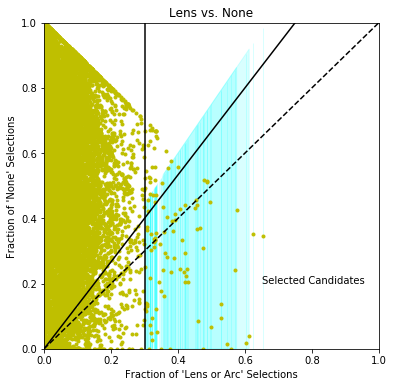

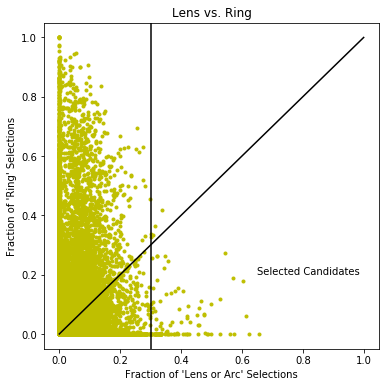

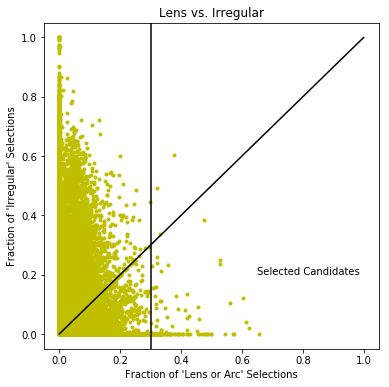

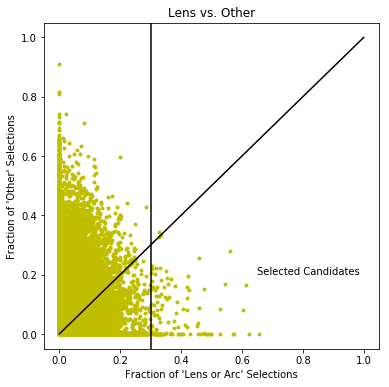

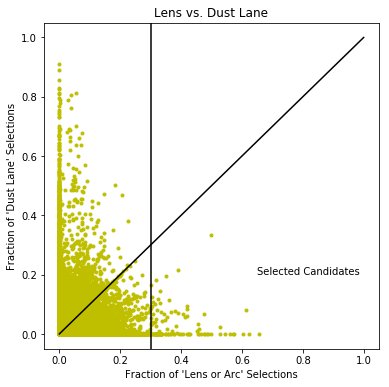

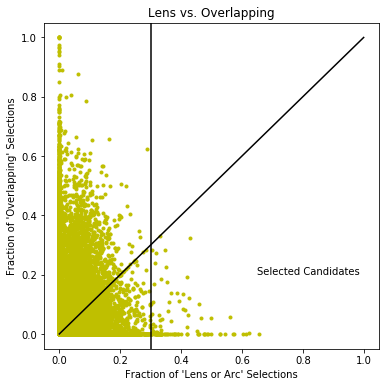

In [4]:
# Plotting Lens Fraction against other selections (6 total)

x = galaxyzoo.oddtype_lens_or_arc_frac
y = galaxyzoo.oddtype_none_frac

fig, ax = plt.subplots(figsize=(6,6))
plt.plot(galaxyzoo.oddtype_lens_or_arc_frac, galaxyzoo.oddtype_none_frac, 'y.')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.plot([0,1], 'k--')
ax.plot([0,4/3], 'k-')
plt.axvline(x=0.3, linestyle = '-', color = 'k')
plt.xlabel("Fraction of 'Lens or Arc' Selections")
plt.ylabel("Fraction of 'None' Selections")
plt.title("Lens vs. None")
plt.text(0.65, 0.2, "Selected Candidates")
plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Zoo_lens_vs_none.png')
plt.fill_between(galaxyzoo.oddtype_lens_or_arc_frac, y1 = 3/2 * galaxyzoo.oddtype_lens_or_arc_frac, y2=0, # Fill region for false candidates
                 where=(galaxyzoo.oddtype_lens_or_arc_frac>0.3),
                 facecolor="cyan", # The fill color
                 color='cyan',       # The outline color
                 alpha=0.15, # Transparency of the fill
                label='$\Delta$z < 0.1') 

plt.show()

fig, ax = plt.subplots(figsize=(6,6))
plt.plot(galaxyzoo.oddtype_lens_or_arc_frac, galaxyzoo.oddtype_ring_frac, 'y.')
plt.axvline(x=0.3, linestyle = '-', color = 'k')
ax.plot([0,1], 'k-')
plt.xlabel("Fraction of 'Lens or Arc' Selections")
plt.ylabel("Fraction of 'Ring' Selections")
plt.title("Lens vs. Ring")
plt.text(0.65, 0.2, "Selected Candidates")
plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Zoo_lens_vs_ring.png')

plt.show()

fig, ax = plt.subplots(figsize=(6,6))
plt.plot(galaxyzoo.oddtype_lens_or_arc_frac, galaxyzoo.oddtype_irregular_frac, 'y.')
plt.axvline(x=0.3, linestyle = '-', color = 'k')
ax.plot([0,1], 'k-')
plt.xlabel("Fraction of 'Lens or Arc' Selections")
plt.ylabel("Fraction of 'Irregular' Selections")
plt.title("Lens vs. Irregular")
plt.text(0.65, 0.2, "Selected Candidates")
plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Zoo_lens_vs_irregular.png')

plt.show()

fig, ax = plt.subplots(figsize=(6,6))
plt.plot(galaxyzoo.oddtype_lens_or_arc_frac, galaxyzoo.oddtype_other_frac, 'y.')
plt.axvline(x=0.3, linestyle = '-', color = 'k')
ax.plot([0,1], 'k-')
plt.xlabel("Fraction of 'Lens or Arc' Selections")
plt.ylabel("Fraction of 'Other' Selections")
plt.title("Lens vs. Other")
plt.text(0.65, 0.2, "Selected Candidates")
plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Zoo_lens_vs_other.png')

plt.show()

fig, ax = plt.subplots(figsize=(6,6))
plt.plot(galaxyzoo.oddtype_lens_or_arc_frac, galaxyzoo.oddtype_dust_lane_frac, 'y.')
plt.axvline(x=0.3, linestyle = '-', color = 'k')
ax.plot([0,1], 'k-')
plt.xlabel("Fraction of 'Lens or Arc' Selections")
plt.ylabel("Fraction of 'Dust Lane' Selections")
plt.title("Lens vs. Dust Lane")
plt.text(0.65, 0.2, "Selected Candidates")
plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Zoo_lens_vs_dustlane.png')

plt.show()

fig, ax = plt.subplots(figsize=(6,6))
plt.plot(galaxyzoo.oddtype_lens_or_arc_frac, galaxyzoo.oddtype_overlapping_frac, 'y.')
plt.axvline(x=0.3, linestyle = '-', color = 'k')
ax.plot([0,1], 'k-')
plt.xlabel("Fraction of 'Lens or Arc' Selections")
plt.ylabel("Fraction of 'Overlapping' Selections")
plt.title("Lens vs. Overlapping")
plt.text(0.65, 0.2, "Selected Candidates")
plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Zoo_lens_vs_overlapping.png')

plt.show()

# Hard Zoo Cut
## Writing new cut to acquire our final Zoo catalogue > 30% Lens Score, above all other feature's scores and above 1/2 None Score.
Gives 76 candidates

In [17]:
zoo_hard_cut = zoo_with_all_scores[(zoo_with_all_scores.LENS >= 0.3) &
                                        (zoo_with_all_scores.LENS >= (1/2)*zoo_with_all_scores.NONE) &
                                          (zoo_with_all_scores.LENS >= zoo_with_all_scores.RING) &
                                          (zoo_with_all_scores.LENS >= zoo_with_all_scores.IRREGULAR) &
                                          (zoo_with_all_scores.LENS >= zoo_with_all_scores.OTHER) &
                                          (zoo_with_all_scores.LENS >= zoo_with_all_scores.DUST_LANE) &
                                          (zoo_with_all_scores.LENS >= zoo_with_all_scores.OVERLAPPING) &
                                         (zoo_with_all_scores.Z.notnull())]

zoo_hard_cut = zoo_hard_cut.reset_index()
zoo_hard_cut = zoo_hard_cut.drop(columns = ['index', 'Unnamed: 0'])
zoo_hard_cut.to_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/zoo_hard_cut.csv')
zoo_hard_cut

,GAMA_ID,RA,DEC,LENS_SCORE,STELLAR_MASS,Z,NONE,RING,LENS,IRREGULAR,OTHER,DUST_LANE,OVERLAPPING
0,511867,216.38846,-1.11396,0.352229,5.459000e+10,0.0550,0.509833,0.134412,0.352229,0.000000,0.002464,0.000000,0.001062
1,485873,217.75015,-1.80042,0.349456,4.908000e+10,0.0539,0.000000,0.007095,0.349456,0.007095,0.212768,0.196278,0.227310
2,164479,177.65720,-2.81587,0.356799,1.184000e+10,0.0993,0.356799,0.246375,0.356799,0.000000,0.040027,0.000000,0.000000
3,165259,180.44234,-2.82167,0.335770,1.010000e+10,0.1018,0.652506,0.000000,0.335770,0.011724,0.000000,0.000000,0.000000
4,70022,178.02218,0.07392,0.368109,8.046000e+10,0.0599,0.403382,0.000000,0.368109,0.000000,0.184054,0.000000,0.044455
5,171055,176.81020,-2.29890,0.307655,3.707000e+09,0.1314,0.373374,0.153827,0.307655,0.153827,0.000000,0.000000,0.011317
6,170898,176.46563,-2.33643,0.336096,2.319000e+11,0.1215,0.647289,0.016615,0.336096,0.000000,0.000000,0.000000,0.000000
7,184275,175.91698,-1.44119,0.317262,4.411000e+10,0.1237,0.475487,0.018395,0.317262,0.000000,0.000000,0.182669,0.006188
8,84050,175.79849,0.47814,0.365758,5.471000e+10,0.1190,0.281374,0.137329,0.365758,0.000000,0.002913,0.075295,0.137329
9,7104,175.71213,0.83228,0.333333,1.768000e+10,0.0751,0.666667,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000


# Hard Mac Cut
## Cutting Machine Learning catalogue to include only those whose visual score was at least 14/70.
Gives 69 candidates

In [18]:
mac_hard_cut = mac_with_mass[mac_with_mass.SCORE >= 14]

mac_hard_cut = mac_hard_cut.reset_index()
mac_hard_cut = mac_hard_cut.drop(columns = ['index','Unnamed: 0','Unnamed: 0.1'])
mac_hard_cut.to_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/mac_hard_cut.csv')

mac_hard_cut

,GAMA_ID,ID,RA,DEC,SCORE,STELLAR_MASS,Z
0,3899011.0,2251.0,131.33397,-0.91563,64.0,3.294000e+11,0.4027
1,376338.0,2660.0,132.98734,1.50468,30.0,3.034000e+11,0.3272
2,323152.0,2967.0,130.54643,1.64325,30.0,8.277000e+11,0.7216
3,663364.0,2669.0,140.35284,-0.97414,28.0,2.688000e+11,0.3221
4,3629152.0,1933.0,135.88864,-0.97487,26.0,2.129000e+11,0.4059
5,3575500.0,1906.0,129.23265,-1.57512,26.0,3.209000e+11,0.3652
6,197972.0,2007.0,137.85838,-0.75280,24.0,3.551000e+11,0.3373
7,3883690.0,2756.0,134.57492,-1.55142,22.0,1.362000e+11,0.2481
8,3911769.0,1704.0,138.66089,-1.11639,20.0,1.740000e+11,0.2794
9,371400.0,2275.0,131.20438,1.00064,18.0,2.021000e+11,0.2948


## Plots of Regions G09, G12, and G15

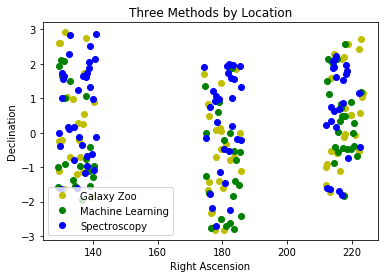

In [19]:
# Plot of three methods by location in three fields. Zoo data 
# is given for all objects that received score > 0
plt.plot(zoo_hard_cut.RA,zoo_hard_cut.DEC,'yo',label='Galaxy Zoo')
plt.plot(mac_hard_cut.RA,mac_hard_cut.DEC,'go',label='Machine Learning')
plt.plot(spec_in_gama.RA,spec_in_gama.DEC,'bo',label='Spectroscopy')

plt.xlabel("Right Ascension")
plt.ylabel("Declination")
plt.title("Three Methods by Location")
plt.legend(loc='best')
plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Plots_of_three_regions.pdf')

plt.show()

/home/shawn/miniconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


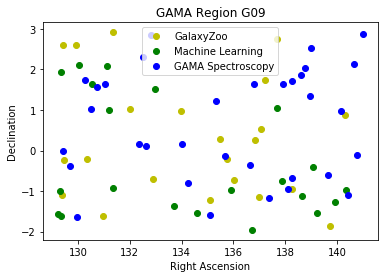

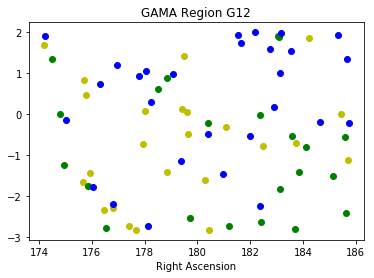

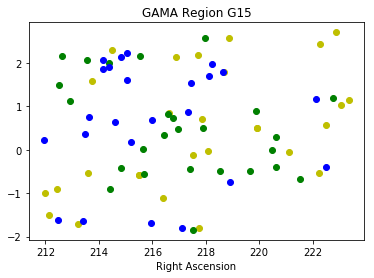

In [20]:
# Identifying the lenses found in GAMA Regions G09, G12, and G15 from

spec_in_G09 = spec[(spec.ra >= 129.0) & (spec.ra <= 141.0) & (spec.dec >= -2) & (spec.dec <= 3)]
spec_in_G12 = spec[(spec.ra >= 174.0) & (spec.ra <= 186.0) & (spec.dec >= -3) & (spec.dec <= 2)]                   
spec_in_G15 = spec[(spec.ra >= 211.5) & (spec.ra <= 223.5) & (spec.dec >= -2) & (spec.dec <= 3)]

mac_in_G09 = mac_hard_cut[(mac_hard_cut.RA >= 129.0) & (mac_hard_cut.RA <= 141.0) & (mac_hard_cut.DEC >= -2) & (mac_hard_cut.DEC <= 3)]
mac_in_G12 = mac_hard_cut[(mac_hard_cut.RA >= 174.0) & (mac_hard_cut.RA <= 186.0) & (mac_hard_cut.DEC >= -3) & (mac_hard_cut.DEC <= 2)]
mac_in_G15 = mac_hard_cut[(mac_hard_cut.RA >= 211.5) & (mac_hard_cut.RA <= 223.5) & (mac_hard_cut.DEC >= -2) & (mac_hard_cut.DEC <= 3)]

zoo_in_G09 = zoo_hard_cut[(zoo_hard_cut.RA >= 129.0) & (zoo_hard_cut.RA <= 141.0) & (zoo_hard_cut.DEC >= -2) & (zoo_hard_cut.DEC <= 3)]
zoo_in_G12 = zoo_hard_cut[(zoo_hard_cut.RA >= 174.0) & (zoo_hard_cut.RA <= 186.0) & (zoo_hard_cut.DEC >= -3) & (zoo_hard_cut.DEC <= 2)]
zoo_in_G15 = zoo_hard_cut[(zoo_hard_cut.RA >= 211.5) & (zoo_hard_cut.RA <= 223.5) & (zoo_hard_cut.DEC >= -2) & (zoo_20.DEC <= 3)]


# Plots of individual GAMA regions G09, G12, and G15 to show the distribution.
# Plot of G09.
plt.plot(zoo_in_G09.RA,zoo_in_G09.DEC,'yo',label='GalaxyZoo')
plt.plot(mac_in_G09.RA,mac_in_G09.DEC,'go',label='Machine Learning')
plt.plot(spec_in_G09.ra,spec_in_G09.dec,'bo',label='GAMA Spectroscopy')

plt.xlabel("Right Ascension")
plt.ylabel("Declination")
plt.title("GAMA Region G09")
plt.legend(loc='best')
plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Final_Cut_Candidates_in_G09.pdf')

plt.show()

# Plot of G12.
plt.plot(zoo_in_G12.RA,zoo_in_G12.DEC,'yo')#label='Galaxy Zoo')
plt.plot(mac_in_G12.RA,mac_in_G12.DEC,'go')#label='Machine Learning')
plt.plot(spec_in_G12.ra,spec_in_G12.dec,'bo')#label='GAMA Spectroscopy')

plt.xlabel("Right Ascension")
#plt.ylabel("Declination")
plt.title("GAMA Region G12")
#plt.legend(loc='best')
plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Final_Cut_Candidates_in_G12.pdf')

plt.show()

# Plot of G15.
plt.plot(zoo_in_G15.RA,zoo_in_G15.DEC,'yo')#,label='Galaxy Zoo')
plt.plot(mac_in_G15.RA,mac_in_G15.DEC,'go')#,label='Machine Learning')
plt.plot(spec_in_G15.ra,spec_in_G15.dec,'bo')#,label='GAMA Spectroscopy')

plt.xlabel("Right Ascension")
#plt.ylabel("Declination")
plt.title("GAMA Region G15")
#plt.legend(loc='best')
plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Final_Cut_Candidates_in_G15.pdf')

plt.show()

# New Mass - Redshift plot using hard cuts.

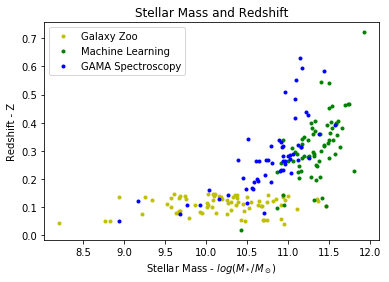

In [21]:
plt.plot(np.log10(zoo_hard_cut.STELLAR_MASS), zoo_hard_cut.Z, 'y.',label='Galaxy Zoo')
plt.plot(np.log10(mac_hard_cut.STELLAR_MASS), mac_hard_cut.Z, 'g.',label='Machine Learning')
plt.plot(np.log10(spec_with_mass.STELLAR_MASS), spec_with_mass.Z, 'b.',label='GAMA Spectroscopy')

plt.xlabel(r"Stellar Mass - $log(M_*/M_\odot)$")
plt.ylabel("Redshift - Z")
plt.title("Stellar Mass and Redshift")
plt.legend(loc='best')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Stellar_mass_to_redshift_plot_Final_Cut.pdf')

# New Overlaps with new Zoo and Mac cuts
## Hard cut
Mac/Zoo = 2
Mac/Spec = 0
Spec/Zoo = 0

In [22]:
pd.merge(zoo_hard_cut, mac_hard_cut, on = 'GAMA_ID', how = 'inner')

,GAMA_ID,RA_x,DEC_x,LENS_SCORE,STELLAR_MASS_x,Z_x,NONE,RING,LENS,IRREGULAR,OTHER,DUST_LANE,OVERLAPPING,ID,RA_y,DEC_y,SCORE,STELLAR_MASS_y,Z_y
0,124486,179.72998,-2.51919,0.426190,8.541000e+10,0.1435,0.243537,0.0,0.426190,0.060884,0.147619,0.00000,0.121769,2553.0,179.73003,-2.51895,28.0,8.541000e+10,0.1435
1,136604,175.87349,-1.74167,0.316451,2.866000e+11,0.1060,0.071956,0.0,0.316451,0.087558,0.223995,0.02621,0.273830,1642.0,175.87355,-1.74164,58.0,2.866000e+11,0.1060


In [23]:
pd.merge(zoo_hard_cut, spec_with_mass, on = 'GAMA_ID', how = 'inner')

,GAMA_ID,RA_x,DEC_x,LENS_SCORE,STELLAR_MASS_x,Z_x,NONE,RING,LENS,IRREGULAR,...,OVERLAPPING,Unnamed: 0,Unnamed: 0.1,RA_y,DEC_y,z1,z2,spec_type,STELLAR_MASS_y,Z_y


In [24]:
pd.merge(mac_hard_cut, spec_with_mass, on = 'GAMA_ID', how = 'inner')

,GAMA_ID,ID,RA_x,DEC_x,SCORE,STELLAR_MASS_x,Z_x,Unnamed: 0,Unnamed: 0.1,RA_y,DEC_y,z1,z2,spec_type,STELLAR_MASS_y,Z_y


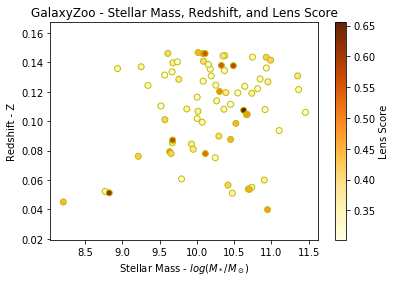

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)
p = ax.scatter(np.log10(zoo_hard_cut.STELLAR_MASS), zoo_hard_cut.Z, c = zoo_hard_cut.LENS_SCORE, cmap = "YlOrBr", edgecolors = "y")
plt.cbar = plt.colorbar(p, shrink=1, orientation='vertical') #, anchor=(0,1.5))
plt.cbar.set_label('Lens Score', fontsize=10)
plt.xlabel("Stellar Mass - $log(M_*/M_\odot)$")
plt.ylabel("Redshift - Z")
plt.title("GalaxyZoo - Stellar Mass, Redshift, and Lens Score")
plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/zoo_hard_cut_stellar_mass_redshift_lenscore.pdf')

plt.show()

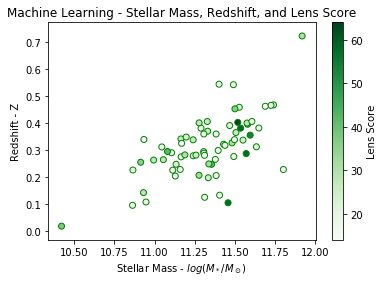

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
p = ax.scatter(np.log10(mac_hard_cut.STELLAR_MASS), mac_hard_cut.Z, c = mac_hard_cut.SCORE, cmap = "Greens", edgecolors = 'g')
plt.cbar = plt.colorbar(p, shrink=1, orientation='vertical') #, anchor=(0,1.5))
plt.cbar.set_label('Lens Score', fontsize=10)
plt.xlabel("Stellar Mass - $log(M_*/M_\odot)$")
plt.ylabel("Redshift - Z")
plt.title("Machine Learning - Stellar Mass, Redshift, and Lens Score")
plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/mac_hard_cut_stellar_mass_redshift_lens_score.pdf')

plt.show()

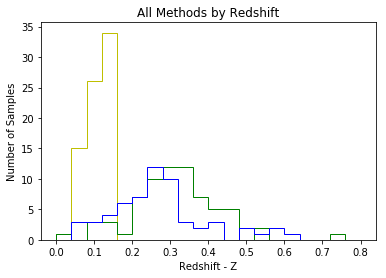

In [27]:
plt.xlabel("Redshift - Z")
plt.ylabel("Number of Samples")
plt.title("All Methods by Redshift")
plt.hist(zoo_hard_cut.Z,range=[0,0.8],bins=20,color='y', histtype = 'step')
plt.hist(mac_hard_cut.Z,range=[0,0.8],bins=20,color='g', histtype = 'step')
plt.hist(spec_with_mass.Z,range=[0,0.8],bins=20,color='b',  histtype = 'step')
plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Histogram_redshift_all_methods_with_hard_cuts.pdf')

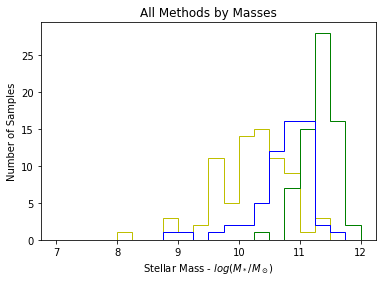

In [28]:
plt.xlabel(r"Stellar Mass - $log(M_*/M_\odot)$")
plt.ylabel("Number of Samples")
plt.title("All Methods by Masses")
plt.hist(np.log10(zoo_hard_cut.STELLAR_MASS),range=[7,12],bins=20,color='y', histtype = 'step')
plt.hist(np.log10(mac_hard_cut.STELLAR_MASS),range=[7,12],bins=20,color='g', histtype = 'step')
plt.hist(np.log10(spec_with_mass.STELLAR_MASS),range=[7,12],bins=20,color='b', histtype = 'step')
plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Histogram_stellar_masses_all_methods_with_hard_cuts.pdf')

## Creating Three-Panel Plot with Mass to Z Scatter and Histograms

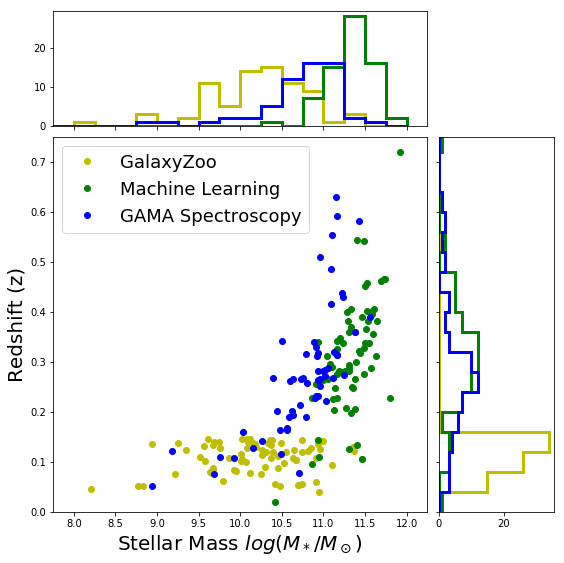

In [29]:
# Three-panel plot
from matplotlib.ticker import NullFormatter
nullfmt   = NullFormatter()         # no labels
# definitions for the axes
left, width = 0.1, 0.65
lower, height = 0.1, 0.65
lower_h = left_h = left+width+0.02
    
rect_scatter = [left, lower, width, height]
rect_histx = [left, lower_h, width, 0.2]
rect_histy = [left_h, lower, 0.2, height]
    
    # start with a rectangular Figure
plt.figure(1, figsize=(8,8))
    
axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)
    
    # no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# the scatter plots
axScatter.set_xlim((min(np.log10(zoo_hard_cut.STELLAR_MASS))-0.5, max(np.log10(mac_hard_cut.STELLAR_MASS))+0.5))
axScatter.set_ylim((min(mac_hard_cut.Z)-0.05, max(mac_hard_cut.Z)+0.05))
axScatter.plot(np.log10(zoo_hard_cut.STELLAR_MASS), zoo_hard_cut.Z, 'yo',label='GalaxyZoo')
axScatter.plot(np.log10(mac_hard_cut.STELLAR_MASS), mac_hard_cut.Z, 'go',label='Machine Learning')
axScatter.plot(np.log10(spec_with_mass.STELLAR_MASS), spec_with_mass.Z, 'bo',label='GAMA Spectroscopy')
axScatter.legend(loc='upper left', numpoints=1, fontsize = 18)
    
    
# now determine nice limits by hand:
binwidth = 0.5
bins=20
#xbins = np.arange(min(zoo_hard_cut.STELLAR_MASS),max(zoo_hard_cut.STELLAR_MASS), (max(zoo_hard_cut.STELLAR_MASS)-min(zoo_hard_cut.STELLAR_MASS))/bins)
#ybins = np.arange(min(zoo_hard_cut.Z),max(zoo_hard_cut.Z), (max(zoo_hard_cut.Z)-min(zoo_hard_cut.Z))/bins)

axScatter.set_xlim((min(zoo_hard_cut.STELLAR_MASS)-0.5, max(zoo_hard_cut.STELLAR_MASS)+0.5))
axScatter.set_ylim((min(zoo_hard_cut.Z)-0.05, max(zoo_hard_cut.Z)+0.05))
axScatter.axis([7.75,12.25,0.,0.75], prop={'size':25})

axScatter.set_xlabel(r'Stellar Mass $log(M_*/M_\odot)$', fontsize=20)
axScatter.set_ylabel(r'Redshift (z)', fontsize=20)
    
#xbins = np.arange(8.5, 12.5, xbinwidth)
#ybins = np.arange(0., 0.6, ybinwidth)
    
axHisty.hist(zoo_hard_cut.Z, orientation='horizontal', range=[0,0.8], bins=bins,color='y', histtype = 'step', linewidth=3)
axHisty.hist(mac_hard_cut.Z, orientation='horizontal', range=[0,0.8], bins=bins,color='g', histtype = 'step', linewidth=3)
axHisty.hist(spec_with_mass.Z, orientation='horizontal', range=[0,0.8],  bins=bins,color='b',  histtype = 'step', linewidth=3)
    
axHistx.hist(np.log10(zoo_hard_cut.STELLAR_MASS), range=[7,12], bins=bins,color='y', histtype = 'step', linewidth=3)
axHistx.hist(np.log10(mac_hard_cut.STELLAR_MASS), range=[7,12], bins=bins,color='g', histtype = 'step', linewidth=3)
axHistx.hist(np.log10(spec_with_mass.STELLAR_MASS), range=[7,12], bins=bins,color='b', histtype = 'step', linewidth=3)
    
axHistx.set_xlim( axScatter.get_xlim() )
axHisty.set_ylim( axScatter.get_ylim() )

plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/All_methods_mass_to_redshift_with_histograms.pdf')

In [30]:
# Opening GAMA data from G09, G12, and G15 (DR3)
hdul = fits.open('/home/shawn/Desktop/gravitational_lensing_research/FITS_Files/SpecAll.fits')  # open a FITS file
hdul.verify('fix')
gama = hdul[1].data  # assume the first extension is a table
print(gama.columns)

ColDefs(
    name = 'SPECID'; format = '33A'
    name = 'SURVEY'; format = '9A'
    name = 'SURVEY_CODE'; format = 'I'; null = -32768
    name = 'RA'; format = 'D'; unit = 'deg'
    name = 'DEC'; format = 'D'; unit = 'deg'
    name = 'WMIN'; format = 'E'; unit = 'A'
    name = 'WMAX'; format = 'D'; unit = 'A'
    name = 'Z'; format = 'E'
    name = 'NQ'; format = 'I'; null = -32768
    name = 'PROB'; format = 'E'
    name = 'FILENAME'; format = '67A'
    name = 'URL'; format = '88A'
    name = 'URL_IMG'; format = '92A'
    name = 'CATAID'; format = 'J'; null = -2147483648
    name = 'GAMA_NAME'; format = '23A'
    name = 'IC_FLAG'; format = 'I'; null = -32768
    name = 'DIST'; format = 'E'; unit = 'arcsec'
    name = 'IS_SBEST'; format = 'L'
    name = 'IS_BEST'; format = 'L'
)


In [31]:
G09 = gama[(gama.RA >= 129.0) & (gama.RA <= 141.0) & (gama.DEC >= -2) & (gama.DEC <= 3)]
G12 = gama[(gama.RA >= 174.0) & (gama.RA <= 186.0) & (gama.DEC >= -3) & (gama.DEC <= 2)]                   
G15 = gama[(gama.RA >= 211.5) & (gama.RA <= 223.5) & (gama.DEC >= -2) & (gama.DEC <= 3)]

print(len(G09), len(G12), len(G15))

32728 44306 94592


## Searching for lenses identified through GZ whose source galaxies may have a measured spectrum in GAMA.

In [32]:
### 6/18 Looking for galaxies that may be identifiable as source galaxies using the Einstein radius equation.
zoo = zoo_hard_cut
zoo['DL'] = cosmo.luminosity_distance(zoo.Z) / 1000 # add column for distance to lens in GPC
zoo['SOURCE_GAMA_ID'] = pd.Series(0, index = range(len(zoo))) # add column for source GAMA_ID
zoo['SOURCE_Z'] = pd.Series(0, index = range(len(zoo))) # add column for source Z
zoo['EINSTEIN_RADIUS'] = pd.Series(0, index = range(len(zoo))) # add column for Einstein Radius


for i in range(len(zoo)):
    for j in range(len(gama)):
        r = np.sqrt(np.square(zoo.RA[i] - gama.RA[j]) + np.square(zoo.DEC[i] - gama.DEC[j])) # RA/DEC difference (potential Einstein Radius)
        thetaE1 = np.sqrt(zoo.STELLAR_MASS[i] / 10**11.09) * np.sqrt(zoo.DL[i] / 2) / 3600. # Lower limit on ER (/3600 to convert to degrees)
        thetaE1000 = np.sqrt(zoo.STELLAR_MASS[i] * 1000. / 10**11.09) * np.sqrt(zoo.DL[i] / 2.) / 3600. # Upper limit on ER (/3600 to convert to degrees)
        if r >= thetaE1 and r <= thetaE1000 and zoo.GAMA_ID[i] != gama.CATAID[j] and zoo.Z[i] > gama.Z[j]:
            zoo.SOURCE_GAMA_ID[i] = gama.CATAID[j]
            zoo.SOURCE_Z[i] = gama.Z[j]
            zoo.EINSTEIN_RADIUS[i] = r
            print('Ready to roll out!', i, zoo.GAMA_ID[i], zoo.SOURCE_GAMA_ID[i])
        elif j == 214623:
            print('You must construct additional pylons', i)

KeyboardInterrupt: 

In [ ]:
zoo_with_gama_source = zoo[zoo.SOURCE_GAMA_ID != 0]
zoo_with_gama_source.to_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/zoo_with_gama_source.csv')
zoo_with_gama_source

In [ ]:
zoo = zoo_hard_cut
zoo['DL'] = cosmo.luminosity_distance(zoo.Z) / 1000 # add column for distance to lens in GPC
zoo['SOURCE_GAMA_ID'] = pd.Series(0, index = range(len(zoo))) # add column for source GAMA_ID
zoo['SOURCE_Z'] = pd.Series(0, index = range(len(zoo))) # add column for source Z
zoo['EINSTEIN_RADIUS'] = pd.Series(0, index = range(len(zoo))) # add column for Einstein Radius

thetaE1000 = np.sqrt(zoo.STELLAR_MASS[0] * 1000 / 10**11.09) * np.sqrt(zoo.DL[0] / 2) # I think 1000 is too much.
print(thetaE1000) # Gave radius of 8 arcsecs... Need to divide by 3600 to get degrees!

In [ ]:
spectroscopic_surveys = pd.DataFrame({'SURVEY_NAME' : ['GAMA II', 'SLACS', 'SLACS-Masses', 'BELLS'],
                                     'PARENT_SURVEY' : ['GAMA', 'SDSS-DR6 MAIN and SDSS-LRG', 'SDSS-DR7', 'BOSS (SDSS-III)'],
                                      #'AREA_deg2' : [180, '7425+8333',9380,10000],
                                     'AREA_deg2' : [180, 7425+8333, 9380, 10000],
                                     #'DEPTH_r' : [19.8, '17.77+19.5' I did a weighted avg using area as the weight, 17.77, 17.77],
                                     'DEPTH_r' : [19.8, 18.68, 17.77, 17.77],
                                     #'SPEC_PER_SQDEG' : [748.5 *GAMA DR3 had 154809 - 20086 in G02,'106.4+12' another weighted avg, 99, 95.27],
                                      'SPEC_PER_SQDEG' : [748.5,56.48, 99, 95.27],
                                     'CANDIDATES' : [85, 131, 118, 45],
                                     'CANDIDATES_PER_SQDEG' : [0.4722, 0.01764, 0.01258, 0.0045]},
                                     index = [1,2,3,4])

imaging_surveys = pd.DataFrame({'SURVEY_NAME' : ['KiDS_Petrillo','KiDS_ML', 'KiDS_GZ', 'DES', 'DECALS'],
                                     'PARENT_SURVEY' : ['KiDS DR4', 'KiDS DR4', 'KiDS', 'DES', 'DESI Legacy Imagine Surveys'],
                                'AREA_deg2' : [604, 180, 60, 5000, 9000],
                                     'DEPTH_r' : [25, 25, 25, 23.74, 23.65], #DECaLS is weighted avg b/c overlaps with 5000 of DES
                                     'PSF_PWHM' : [0.8, 0.8, 0.8, 0.958, 1.057], #DECaLS is weighted avg b/c overlaps with 5000 of DES
                                'CANDIDATES' : [308, 69, 76, 511, 341],
                                     'CANDIDATES_PER_SQDEG' : [0.3407, 0.3833, 0.422, 0.1022, 0.0379]},
                               index = [1,2,3,4,5])

In [ ]:
spectroscopic_surveys

In [ ]:
imaging_surveys

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(1.6, 3.1)
ax.set_ylim(17, 21)

x = np.log10(spectroscopic_surveys.SPEC_PER_SQDEG)
y = spectroscopic_surveys.DEPTH_r
c = spectroscopic_surveys.CANDIDATES_PER_SQDEG
v = spectroscopic_surveys.CANDIDATES_PER_SQDEG*10000

p = ax.scatter(x, y, s=v, c=c, cmap = "plasma")
plt.cbar = plt.colorbar(p, shrink=1, orientation='vertical',ticks=[0.1,0.2,0.3,0.4], spacing='uniform') #, anchor=(0,1.5))
plt.cbar.set_label('Candidates per $degree^2$', fontsize=10)
plt.xlabel("$log_{10}$(Spectra per deg$^2$)")
plt.ylabel("Limiting Depth - r")
plt.title("Spectroscopic Strong Lens Searches")

plt.text(2.755, 19.75, "GAMA II")
plt.text(1.65, 18.9, "SLACS")
plt.text(2.05, 17.7, "SLACS-S4TM")
plt.text(1.775, 17.7, "BOSS")
plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/spectroscopy_surveys_plot.pdf')
plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/spectroscopy_surveys_plot.png')

plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(0.7, 1.2)
ax.set_ylim(23, 25.5)

x = imaging_surveys.PSF_PWHM
y = imaging_surveys.DEPTH_r
c = imaging_surveys.CANDIDATES_PER_SQDEG
v = imaging_surveys.CANDIDATES_PER_SQDEG*10000

p = ax.scatter(x, y, c=c, s=v, cmap = "plasma")
plt.cbar = plt.colorbar(p, shrink=1, orientation='vertical',ticks=[0.1,0.2,0.3,0.4], spacing='uniform') #, anchor=(0,1.5))
plt.cbar.set_label('Candidates per $degree^2$', fontsize=10)
plt.xlabel("PSF (PWHM)")
plt.ylabel("Limiting Depth - r")
plt.title("Deep Imaging Strong Lens Searches")

plt.text(0.775, 25.0, "KiDS")
plt.text(0.937, 24, "DES")
plt.text(1.085, 23.6, "DECaLS")
plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/imaging_surveys.pdf')
plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/imaging_surveys.png')

plt.show()

In [ ]:
zoo_candidate_table = zoo_hard_cut.drop(['NONE','RING','LENS','IRREGULAR','OTHER','DUST_LANE','OVERLAPPING','DL','SOURCE_GAMA_ID','SOURCE_Z','EINSTEIN_RADIUS'],axis=1)
zoo_candidate_table = zoo_candidate_table.reindex(columns=['GAMA_ID','STELLAR_MASS','Z','LENS_SCORE','RA','DEC'])
zoo_candidate_table = zoo_candidate_table.sort_values(by='GAMA_ID')
zoo_candidate_table = zoo_candidate_table.astype(float)
zoo_candidate_table = zoo_candidate_table.reset_index()
zoo_candidate_table = zoo_candidate_table.drop(columns='index')
zoo_candidate_table.to_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/zoo_candidate_table.csv')

In [ ]:
zoo_candidate_table